# **IDENTITAS DIRI**
1. Nama: Siska Apriana Rifianti
2. Alamat: Jl. Gunung Kawi, Kec. Besuki, Kab. Situbondo
3. Alamat E-mail: siska.apriana.1703226@students.um.ac.id





# **Proyek Akhir: Klasifikasi Gambar**
<span style="font-family:Patrick Hand"> **Tujuan**: Membuat program jaringan saraf tiruan menggunakan  TensorFlow yang mampu mengenali bentuk tangan yang membentuk gunting, batu, atau kertas. </span>

## 1. **Tahap Pra-Preprocessing**
### 1.1 **Cek Versi dari library Tensorflow**
<span style="font-family:Patrick Hand">Hal ini dilakukan untuk memastikan librarari Tensorflow yang digunakan adalah versi 2.0.0 keatas</span>

In [2]:
import tensorflow as tf
print(tf.__version__)

2.4.1


<span style="font-family:Patrick Hand">Jika versi dari library tensorflow yang digunakan bukan versi 2.0.0 keatas maka kita perlu meng-updatenya. Namun jika libarary TensorFlow kita sudah merupakan versi 2.0.0 ke atas kita tidak perlu melakukan hal tersebut</span>

In [ ]:
#Update dan install versi tensorflow yang diinginkan: (Opsional!)
import sys
!{sys.executable} -m pip install tensorflow==2.4.1 

**Note:** <span style="font-family:Patrick Hand">jangan lupa untuk me-restart/memuat ulang notebook setelah melakukan update dan install sebuah library</span>

In [3]:
#Cek apakah versi tensorflow sudah di-update
print(tf.__version__)

2.4.1


### **1.2 Mendownload Dataset Kedalam  Notebook**

In [3]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-05-11 03:38:07--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.84MB/s    in 3m 40s  

2021-05-11 03:41:48 (1.40 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



<span style="font-family:Patrick Hand">Pastikan dataset kita telah ter-download kedalam notebook:</span>

In [4]:
#Cek dataset:
"""
Dataset yang telah kita dowload akan berada di dalam folder /tmp
"""
import os
os.listdir('/tmp')

['debugger_2ql15kzym',
 'dap_multiplexer.7a637d88d726.root.log.INFO.20210511-033616.48',
 'dap_multiplexer.INFO',
 'rockpaperscissors.zip',
 'initgoogle_syslog_dir.0']

Dapat kita lihat bahwa di dalam foldet tmp telah terdapat file dataset kita yaitu 'rockpaperscissors.zip'

### **1.3 Melakukan Ekstraksi File Dataset**

<span style="font-family:Patrick Hand">Karena file dataset kita masih berbentuk zip file maka kita perlu meng-ekstrak file tersebut agar datanya dapat digunakan</span>

In [5]:
import zipfile
file_zip_name = '/tmp/rockpaperscissors.zip' #Definisikan nama file-zip kedalam variabel file_zip_name
file_zip = zipfile.ZipFile(file_zip_name, 'r') #Buka file-zip yang kita dalam mode read
file_zip.extractall('/tmp') #Ekstrak file zip (jangan lupa untuk menetapkan tempat menyimpan file hasil ekstraksi yaitu di folder tmp)
file_zip.close #Tutup file

<bound method ZipFile.close of <zipfile.ZipFile filename='/tmp/rockpaperscissors.zip' mode='r'>>

In [6]:
#Cek file telah terekstraksi
os.listdir('/tmp')

['debugger_2ql15kzym',
 'dap_multiplexer.7a637d88d726.root.log.INFO.20210511-033616.48',
 'dap_multiplexer.INFO',
 '__MACOSX',
 'rockpaperscissors.zip',
 'initgoogle_syslog_dir.0',
 'rockpaperscissors']

<span style="font-family:Patrick Hand">**Note:** Pada hasil diatas dapat dilihat bahwa telah terdapat direktori rockpaperscissors yang berisi file dataset yang akan kita guanakan.</span>

In [7]:
#cek list direktori di dalam direktori rockpaperscissors
rockpaperscissors_dir = '/tmp/rockpaperscissors'
os.listdir(rockpaperscissors_dir)

['rps-cv-images', 'README_rpc-cv-images.txt', 'rock', 'scissors', 'paper']

### **1.4 Membuat direktori untuk Data Training dan Data Validation teks tebal**

In [8]:
data_training_dir = os.path.join(rockpaperscissors_dir,"training")
data_validation_dir = os.path.join(rockpaperscissors_dir,"validation")

os.mkdir(data_training_dir)
os.mkdir(data_validation_dir)

In [9]:
#Cek terbentuknya direktori baru:
os.listdir(rockpaperscissors_dir)

['rps-cv-images',
 'validation',
 'README_rpc-cv-images.txt',
 'rock',
 'scissors',
 'training',
 'paper']

### **1.5 Mengisi Direktori Data Training dan Data Sets (sesuai ketentuan yang ditetapkan)**

**Ketentuan:** Ukuran validation set harus 40% dari total dataset (data training memiliki 1314 sampel, dan data validasi sebanyak 874 sampel).

<span style="font-family:Patrick Hand">Pertama-tama kita akan melihat isi dari direktori rock, scissors, dan paper. Hal ini dilakukan untuk memastikan bahwa didalam folder tersebut hanya terdapat jenis file dataset yang sama (dalam kasus kita adalah file gambar)</span>

In [10]:
def cek_file_gambar(sumber_direktori):
    list_file = os.listdir(sumber_direktori)
    for file in list_file:
        if not file.endswith(".png") or file.endswith(".jpg"):
            return("Terdapat file bukan gambar di dalam direktori")
            break;
    return("Semua file di dalam direktori adalah file gambar")

In [11]:
rock_dir = os.path.join(rockpaperscissors_dir,'rock')
print("Cek directori rock:", cek_file_gambar(rock_dir))

Cek directori rock: Semua file di dalam direktori adalah file gambar


In [12]:
scissors_dir = os.path.join(rockpaperscissors_dir,'scissors')
print("Cek directori scissors:", cek_file_gambar(scissors_dir))

Cek directori scissors: Semua file di dalam direktori adalah file gambar


In [13]:
paper_dir = os.path.join(rockpaperscissors_dir,'paper')
print("Cek directori paper:", cek_file_gambar(scissors_dir))

Cek directori paper: Semua file di dalam direktori adalah file gambar


<span style="font-family:Patrick Hand">Langkah selanjutnya menghitung jumlah file yang ada didalam direktori rock, scissors, dan paper</span>

In [14]:
def hitung_jumlah_file(sumber_dirFile):
    for path, dir, files in os.walk(sumber_dirFile):
        if files:
            n = 0
            for file in files:
                n += 1

    return(n)


In [15]:
#Menghitung jumlah file untuk:
sum_file_rock_dir = hitung_jumlah_file(rock_dir)
print("jumlah gambar tangan berbentuk rock: ",sum_file_rock_dir)

sum_file_scissors_dir = hitung_jumlah_file(scissors_dir)
print("jumlah gambar tangan berbentuk scissors: ",sum_file_scissors_dir)

sum_file_paper_dir = hitung_jumlah_file(paper_dir)
print("jumlah gambar tangan berbentuk paper: ", sum_file_paper_dir)

total_gambar = sum_file_rock_dir+sum_file_scissors_dir+sum_file_paper_dir
print("total keseluruhan gambar (dataset): ",total_gambar)

jumlah gambar tangan berbentuk rock:  726
jumlah gambar tangan berbentuk scissors:  750
jumlah gambar tangan berbentuk paper:  712
total keseluruhan gambar (dataset):  2188


<span style="font-family:Patrick Hand">Kita akan membagi total keseluruhan gambar yang kita miliki menjadi data training dan data validation. Data validation harus berjumlah 40% dari keseluruhan data yaitu sekitar 874 data</span>

In [16]:
#Mencari jumlah data pada masing-masing kelas yang akan dijadikan sebagai data validation
jumlah_valRock_data = int((726*0.4))
print(jumlah_valRock_data)
jumlah_valScissors_data = int((752*0.4))
print(jumlah_valScissors_data)
jumlah_valPaper_data = int((710*0.4))
print(jumlah_valPaper_data)
total_val = jumlah_valRock_data+jumlah_valPaper_data+jumlah_valScissors_data
print(total_val) #Memastikan bahwa total data yang telah ditetapkan berjumlah 874


290
300
284
874


<span style="font-family:Patrick Hand">Kita akan persiapkan terlebih dahulu direktori untuk menampung masing-masing kelas di dalam direktori training dan validation</span>

In [17]:
#Untuk direktori training
train_rock = os.path.join(data_training_dir,'rock')
os.mkdir(train_rock)
train_scissors = os.path.join(data_training_dir,'scissors')
os.mkdir(train_scissors)
train_paper = os.path.join(data_training_dir,'paper')
os.mkdir(train_paper)

os.listdir(data_training_dir)

['rock', 'scissors', 'paper']

In [18]:
#Untuk direktori validation
val_rock = os.path.join(data_validation_dir,'rock')
os.mkdir(val_rock)
val_scissors = os.path.join(data_validation_dir,'scissors')
os.mkdir(val_scissors)
val_paper = os.path.join(data_validation_dir,'paper')
os.mkdir(val_paper)

os.listdir(data_validation_dir)

['rock', 'scissors', 'paper']

<span style="font-family:Patrick Hand">Memindahkan file ke dalam direktori untuk masing-masing kelas yang berada di dalam direktori training dan validation</span>

In [19]:
#Membuat definisi untuk memindahkan file:
def pindah_file(sumber_dir, target_dir, jumlah_file):
    for path, dir, files in os.walk(sumber_dir):
        if files:
            n = 0
            for file in files:
                if not os.path.isfile(os.path.join(target_dir,file)):
                    os.rename(os.path.join(sumber_dir,file), os.path.join(target_dir,str(n)+'.png'))
                    n +=1
                    if n==jumlah_file :
                        break;
    print('File telah dipindahkan sesuai perminataan')

In [20]:
#Mengisi direktori validation:
#rock:
pindah_file(rock_dir, val_rock, jumlah_valRock_data)
#scissors:
pindah_file(scissors_dir, val_scissors, jumlah_valScissors_data)
#paper:
pindah_file(paper_dir, val_paper, jumlah_valPaper_data)

File telah dipindahkan sesuai perminataan
File telah dipindahkan sesuai perminataan
File telah dipindahkan sesuai perminataan


In [21]:
#cek jumlah file yang dipindahkan
print("data validatian rock: ",hitung_jumlah_file(val_rock))
print("data validation scissors: ",hitung_jumlah_file(val_scissors))
print("data validation paper: ",hitung_jumlah_file(val_paper))


data validatian rock:  290
data validation scissors:  300
data validation paper:  284


In [22]:
#Mengisi direktori validation:
#rock:
pindah_file(rock_dir, train_rock, sum_file_rock_dir-jumlah_valRock_data)
#scissors:
pindah_file(scissors_dir, train_scissors, sum_file_scissors_dir-jumlah_valScissors_data)
#paper:
pindah_file(paper_dir, train_paper, sum_file_paper_dir-jumlah_valPaper_data)

File telah dipindahkan sesuai perminataan
File telah dipindahkan sesuai perminataan
File telah dipindahkan sesuai perminataan


In [23]:
#cek jumlah file yang dipindahkan ke data traininy
print("data training rock: ",hitung_jumlah_file(train_rock))
print("data training scissors: ",hitung_jumlah_file(train_scissors))
print("data training paper: ",hitung_jumlah_file(train_paper))

data training rock:  436
data training scissors:  450
data training paper:  428


In [24]:
#cek isi direktori (bisa pilih salah satu atau seluruhnya:)
os.listdir(train_rock)

['156.png',
 '264.png',
 '63.png',
 '302.png',
 '14.png',
 '367.png',
 '238.png',
 '84.png',
 '333.png',
 '372.png',
 '375.png',
 '79.png',
 '153.png',
 '429.png',
 '258.png',
 '288.png',
 '2.png',
 '5.png',
 '83.png',
 '317.png',
 '426.png',
 '49.png',
 '140.png',
 '352.png',
 '308.png',
 '231.png',
 '296.png',
 '281.png',
 '172.png',
 '393.png',
 '225.png',
 '431.png',
 '299.png',
 '45.png',
 '16.png',
 '347.png',
 '248.png',
 '206.png',
 '159.png',
 '13.png',
 '253.png',
 '158.png',
 '170.png',
 '118.png',
 '123.png',
 '227.png',
 '359.png',
 '95.png',
 '260.png',
 '197.png',
 '247.png',
 '110.png',
 '12.png',
 '241.png',
 '20.png',
 '9.png',
 '433.png',
 '181.png',
 '306.png',
 '349.png',
 '397.png',
 '58.png',
 '374.png',
 '89.png',
 '43.png',
 '266.png',
 '21.png',
 '240.png',
 '407.png',
 '400.png',
 '157.png',
 '330.png',
 '190.png',
 '127.png',
 '192.png',
 '309.png',
 '129.png',
 '395.png',
 '239.png',
 '300.png',
 '232.png',
 '226.png',
 '132.png',
 '230.png',
 '198.png',
 '

## **2. Tahap Preprocessing**

### **2.1 Membuat objek image data generator**
<span style="font-family:Patrick Hand">**ImageDataGenerator** adalah sebuah fungsi yang sangat berguna untuk mempersiapkan data latih dan data testing yang akan diberikan ke model. </span>

<span style="font-family:Patrick Hand">Pada fungsi ImageDataGenerator terdapat beberapa parameter yang bisa digunakan untuk menghasilkan data baru dari data lama.
Pada kasus ini, kita hanya akan menggunakan beberapa fungsi saja. Kalian bisa memilihat beberapa parameter pada fungsi ImageDataGenerator
pada link: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator</span>

In [25]:
#Persiapan data menggunakan ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
"""
Parameter pada ImageDataGenerator yang harus ada adalah rescale=1./255 yang digunakan untuk menormalisasi gambar.
Hal ini dikarenakan, setiap pixel pada gambar memiliki rentang nilai dari 0 ampai 255 maka untuk menormalisasinya kita
harus membagi setiap pixel gambar dengan 255.

"""
train_datagen = ImageDataGenerator(
                rescale=1./255, 
                rotation_range=15,
                horizontal_flip=True,
                shear_range = 0.2,
                zoom_range = 0.2,
                fill_mode = 'nearest')

val_datagen =   ImageDataGenerator(
                rescale=1./255,
                rotation_range=15,
                horizontal_flip=True,
                shear_range = 0.2,
                zoom_range = 0.2,
                fill_mode = 'nearest')

## **3. Tahap Pelatihan Data**
### **3.1 Mempersiapkan data latih untuk Convolutional Neural Network (CNN)**
<span style="font-family:Patrick Hand">Objek image data generator akan digunakan untuk mempersiapkan data latih yang akan dipelajari model</span>

In [26]:
trainData_generator = train_datagen.flow_from_directory(
        data_training_dir, 
        target_size=(150, 150),  #kita melakukan re-size gambar menjadi berukuran (150,150) pixel
        batch_size=32,
        class_mode='categorical') 
"""
Untuk data yang memiliki lebih dari dua kategori kelas kita mengisi parameter class_mode dengan 'categorical'.
Sedangkan jika kita hanya memiliki 2 kategori kelas kita bisa mengisinya dengan 'binary'
"""
 
validationData_generator = val_datagen.flow_from_directory(
        data_validation_dir, 
        target_size=(150, 150), 
        batch_size=32,
        class_mode='categorical')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


### 3.2 **Membangun arsitektur CNN**
<span style="font-family:Patrick Hand">CNN merupakan sebuah arsitektur jaringan saraf tiruan yang menggunakan sebuah atau beberapa layer konvolusi dan MaxPooling pada program jaringan saraf tiruan yang kita bangun hal ini diterapkan oleh fungsi tf.keras.layers.Conv2D dan tf.keras.layers.MaxPooling2D.</span>

<span style="font-family:Patrick Hand">Proses konvolusi adalah proses pengaplikasian filter pada gambar yang dilakukan dengan cara mengalikan matriks gambar dengan matriks filter.
Untuk mengetahui parameter pada **tf.keras.layers.Conv2D**: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D</span>

<span style="font-family:Patrick Hand">Sedangkan MaxPooling adalah proses yang dilakukan untuk mengurangi resolusi gambar dengan tetap mempertahankan informasi pada gambar.
Untuk mengetahui parameter **tf.keras.layers.MaxPooling2D**:
https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D</span>

In [27]:
model = tf.keras.models.Sequential([
    #Proses konvolusi pertama
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)), #kita menggunakan 32 filter
    tf.keras.layers.MaxPooling2D(2, 2),
    #Proses konvolusi kedua
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), #kita menggunakan 64 filter
    tf.keras.layers.MaxPooling2D(2,2),
    #Proses konvolusi ketiga
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), #kita menggunakan 128 filter
    tf.keras.layers.MaxPooling2D(2,2),
    #Proses konvolusi keempat
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'), #kita menggunakan 256 filter
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'), #Ini merupakan hidden layer yang memiliki 256 perceptron
    tf.keras.layers.Dense(512, activation='relu'), #Ini merupakan hidden layer yang memiliki 512 perceptron
    tf.keras.layers.Dense(3, activation='softmax') #Ini merupakan output layer, angka 3 mengindikasikan jumlah kelas
])

model.summary() #Melihat ukuran input dan output untuk setiap layer


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       2

### **2.3 Meng-compile model**
<span style="font-family:Patrick Hand">Untuk mengcompile model kita akan menggunakan fungsi model.compile</span>

In [28]:
model.compile(loss='categorical_crossentropy', #utuk kasus 2 atu lebih kategori kelas menggunaka 'categorical_crossentropy', sedagka jika hanya mempuyai dua kelas megguaka 'binary_crossentropy' 
              optimizer='Adam',
              metrics=['accuracy'])

### **2.4 Melakukan fitting**

In [29]:
# latih model dengan model.fit 
history = model.fit(
          trainData_generator,
          steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
          epochs=30, # jumlah epochs yang kita gunaka (megindikasika berapa kali kita melakukan propagasi balik)
          #Note: kita bisa meambahkan epochs jika dirasa model yang kita hasilka belum maksimal
          validation_data=validationData_generator, # menampilkan akurasi pengujian data validasi
          validation_steps=5,  # bayaknya batch yang akan dieksekusi pada setiap epoch
          verbose=2)
model.save("rphs.5")

Epoch 1/30
25/25 - 40s - loss: 1.0729 - accuracy: 0.3925 - val_loss: 0.7979 - val_accuracy: 0.7500
Epoch 2/30
25/25 - 6s - loss: 0.6066 - accuracy: 0.7779 - val_loss: 0.4361 - val_accuracy: 0.8687
Epoch 3/30
25/25 - 6s - loss: 0.4099 - accuracy: 0.8468 - val_loss: 0.3540 - val_accuracy: 0.8625
Epoch 4/30
25/25 - 6s - loss: 0.3128 - accuracy: 0.8763 - val_loss: 0.3498 - val_accuracy: 0.8125
Epoch 5/30
25/25 - 6s - loss: 0.2709 - accuracy: 0.8922 - val_loss: 0.3241 - val_accuracy: 0.8750
Epoch 6/30
25/25 - 6s - loss: 0.2463 - accuracy: 0.9150 - val_loss: 0.1789 - val_accuracy: 0.9500
Epoch 7/30
25/25 - 6s - loss: 0.2420 - accuracy: 0.9208 - val_loss: 0.2489 - val_accuracy: 0.9125
Epoch 8/30
25/25 - 6s - loss: 0.1791 - accuracy: 0.9362 - val_loss: 0.2830 - val_accuracy: 0.8750
Epoch 9/30
25/25 - 6s - loss: 0.1771 - accuracy: 0.9400 - val_loss: 0.2200 - val_accuracy: 0.9187
Epoch 10/30
25/25 - 6s - loss: 0.1754 - accuracy: 0.9390 - val_loss: 0.1858 - val_accuracy: 0.9375
Epoch 11/30
25/25 

## **3. Tahap Validasi Hasil**

### **3.1 Plot Akurasi Hasil Dari Data Training dan Data Validation**
<span style="font-family:Patrick Hand">Cek apakah model yang kita hasilkan megalami overfittig/underfittig </span>

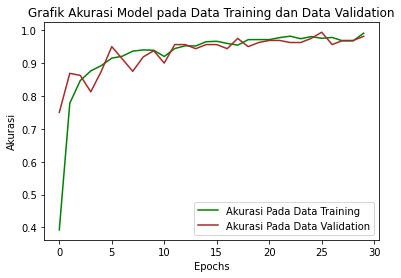

<Figure size 432x288 with 0 Axes>

In [30]:
#plotting grafik akurasi dari data tarining dan data validation:
import matplotlib.pyplot as plt
akurasi = history.history['accuracy'] #akurasi dari data training
val_akurasi= history.history['val_accuracy'] #akurasi dari data validation

j_epochs = range(len(akurasi))

plt.plot(j_epochs, akurasi, 'green', label='Akurasi Pada Data Training')
plt.plot(j_epochs, val_akurasi, 'brown', label='Akurasi Pada Data Validation')
plt.title('Grafik Akurasi Model pada Data Training dan Data Validation')
plt.xlabel("Epochs")
plt.ylabel('Akurasi')
plt.legend(loc='lower right')
plt.figure()

plt.show()

### **3.2 Tes Model**
Kita bisa melakukan tes pada model yang telah kita buat dengan menggunakan gambar lain untuk menguji apakah prediksi yang dihasilkan oleh model kita sudah benar atau tidak

Saving batu.png to batu.png
rock


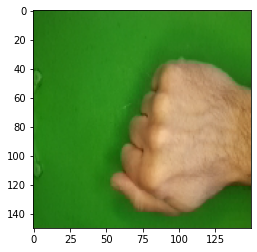

In [33]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)

  if classes[0][0]==1:
    print('Paper')
  elif classes[0][1]==1:
    print('rock')
  elif classes[0][2]==1:
    print('Scissors')